<a href="https://colab.research.google.com/github/vsvipul007/CCode/blob/master/ReveiewAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk



In [5]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
#Load Data 
from google.colab import files
uploaded = files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [7]:
# Importing the dataset
ds = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
ds.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
#Rows and colums of dataset
ds.shape

(1000, 2)

In [9]:
#Deleting Null Values (Empty Strings)
ds.dropna(inplace=True)
#Check for duplicates
ds.drop_duplicates(inplace=True)


In [10]:
#New rows and colums after duplicates repetition
ds.shape

(996, 2)

In [11]:
#Cleaning the text using lemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemm_corpus = []
i=0
for i in ds.index:
  review = re.sub('[^a-zA-Z]', ' ', ds['Review'][i])
  review = review.lower()
  review = review.split()
  lemmatizer = WordNetLemmatizer() 
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  lemm_corpus.append(review)
print(lemm_corpus)

['wow loved place', 'crust not good', 'not tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would not go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place not worth time let alone vega', 'not like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer

In [12]:
#Adding Lemmatized Cleaned Review
ds['lemm_cleaned_review'] = lemm_corpus
ds.head()

,Review,Liked,lemm_cleaned_review
0,Wow... Loved this place.,1,wow loved place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great price


In [13]:
#Cleaning the text using Stemmer
from nltk.stem.porter import PorterStemmer
stem_corpus = []
for i in ds.index:
  review = re.sub('[^a-zA-Z]', ' ', ds['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  stem_corpus.append(review)
print(stem_corpus)


['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [14]:
#Adding Stemmed cleaned review in Dataset
ds['stem_cleaned_review'] = stem_corpus
ds.head()

,Review,Liked,lemm_cleaned_review,stem_cleaned_review
0,Wow... Loved this place.,1,wow loved place,wow love place
1,Crust is not good.,0,crust not good,crust not good
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,selection menu great price,select menu great price


In [15]:
#Sentiment Intensity Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [16]:
#Creating Columns for Scores and Compound Scores for each of the 3 types of inputs (Without Removing Stopwords, Lemmatized + Cleaned, Stemmed + Clean)
ds['scores1'] = ds['Review'].apply(lambda Review: sid.polarity_scores(Review))
ds['scores2'] = ds['lemm_cleaned_review'].apply(lambda lemm_cleaned_review: sid.polarity_scores(lemm_cleaned_review))
ds['scores3'] = ds['stem_cleaned_review'].apply(lambda stem_cleaned_review: sid.polarity_scores(stem_cleaned_review))


ds['compound1']  = ds['scores1'].apply(lambda score_dict: score_dict['compound'])
ds['compound2']  = ds['scores2'].apply(lambda score_dict: score_dict['compound'])
ds['compound3']  = ds['scores3'].apply(lambda score_dict: score_dict['compound'])

ds.head()

,Review,Liked,lemm_cleaned_review,stem_cleaned_review,scores1,scores2,scores3,compound1,compound2,compound3
0,Wow... Loved this place.,1,wow loved place,wow love place,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...","{'neg': 0.0, 'neu': 0.115, 'pos': 0.885, 'comp...","{'neg': 0.0, 'neu': 0.111, 'pos': 0.889, 'comp...",0.5994,0.8271,0.8402
1,Crust is not good.,0,crust not good,crust not good,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'comp...","{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'comp...","{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'comp...",-0.3412,-0.3412,-0.3412
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty,not tasti textur nasti,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou...","{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.5574,0.4449,0.0000
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...,stop late may bank holiday rick steve recommen...,"{'neg': 0.093, 'neu': 0.585, 'pos': 0.322, 'co...","{'neg': 0.131, 'neu': 0.414, 'pos': 0.455, 'co...","{'neg': 0.133, 'neu': 0.301, 'pos': 0.566, 'co...",0.6908,0.6908,0.8020
4,The selection on the menu was great and so wer...,1,selection menu great price,select menu great price,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...","{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...","{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.6249,0.6249


In [17]:
#Assigning Final value and taking 0 as positive
ds['comp_score1'] = ds['compound1'].apply(lambda c: 1 if c >=0 else 0)
ds['comp_score2'] = ds['compound2'].apply(lambda c: 1 if c >=0 else 0)
ds['comp_score3'] = ds['compound3'].apply(lambda c: 1 if c >=0 else 0)

In [18]:
#Assigning Final value taking 0 as negative
ds['comp_scoren1'] = ds['compound1'].apply(lambda c: 1 if c >0 else 0)
ds['comp_scoren2'] = ds['compound2'].apply(lambda c: 1 if c >0 else 0)
ds['comp_scoren3'] = ds['compound3'].apply(lambda c: 1 if c >0 else 0)


In [19]:
#Creating Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("-------------Zero is taken as positive here--------------")
print('Confusion Matrix w/o removing Stopwords: \n', confusion_matrix(ds['comp_score1'],ds['Liked']))
print()
print('Confusion Matrix (Lemmatized) : \n', confusion_matrix(ds['comp_score2'],ds['Liked']))
print()
print('Confusion Matrix (Stemmed): \n', confusion_matrix(ds['comp_score3'],ds['Liked']))
print()
print("-------------Zero is taken as negative here--------------")
print('Confusion Matrix w/o removing Stopwords: \n', confusion_matrix(ds['comp_scoren1'],ds['Liked']))
print()
print('Confusion Matrix (Lemmatized) : \n', confusion_matrix(ds['comp_scoren2'],ds['Liked']))
print()
print('Confusion Matrix (Stemmed): \n', confusion_matrix(ds['comp_scoren3'],ds['Liked']))
print()


-------------Zero is taken as positive here--------------
Confusion Matrix w/o removing Stopwords: 
 [[238  17]
 [259 482]]

Confusion Matrix (Lemmatized) : 
 [[214  23]
 [283 476]]

Confusion Matrix (Stemmed): 
 [[174  23]
 [323 476]]

-------------Zero is taken as negative here--------------
Confusion Matrix w/o removing Stopwords: 
 [[403  94]
 [ 94 405]]

Confusion Matrix (Lemmatized) : 
 [[378  97]
 [119 402]]

Confusion Matrix (Stemmed): 
 [[391 186]
 [106 313]]



In [20]:
#Accuracy Score Calculation when 0 is considered positive
acc_0p = accuracy_score(ds['comp_score1'],ds['Liked'])
acc_lemm_0p = accuracy_score(ds['comp_score2'],ds['Liked'])
acc_stem_0p = accuracy_score(ds['comp_score3'],ds['Liked'])
print("-------------Zero is taken as positive here--------------")
print('Accuracy Score w/o removing Stopwords: ', acc_0p)
print()
print('Accuracy Score (Lemmatized) : ',acc_lemm_0p )
print()
print('Accuracy Score (Stemmed): ', acc_stem_0p)



-------------Zero is taken as positive here--------------
Accuracy Score w/o removing Stopwords:  0.7228915662650602

Accuracy Score (Lemmatized) :  0.6927710843373494

Accuracy Score (Stemmed):  0.6526104417670683


In [21]:
acc_0n = accuracy_score(ds['comp_scoren1'],ds['Liked'])
acc_lemm_0n = accuracy_score(ds['comp_scoren2'],ds['Liked'])
acc_stem_0n = accuracy_score(ds['comp_scoren3'],ds['Liked'])
print("-------------Zero is taken as negative here--------------")
print('Accuracy Score w/o removing Stopwords: ',acc_0n)
print()
print('Accuracy Score (Lemmatized) : ', acc_lemm_0n)
print()
print('Accuracy Score (Stemmed): ', acc_stem_0n)

-------------Zero is taken as negative here--------------
Accuracy Score w/o removing Stopwords:  0.8112449799196787

Accuracy Score (Lemmatized) :  0.7831325301204819

Accuracy Score (Stemmed):  0.7068273092369478


In [22]:
#Creatiing Final Summarized Table ofAccuracy
print("-------------Accuracy Summarized-------------")
data = {'Direct Text':[acc_0p*100, acc_0n*100], 'Lemmatized Text':[acc_lemm_0p*100, acc_lemm_0n*100], 'Stemmed Text':[acc_stem_0p*100, acc_stem_0n*100] }
index = ['Zero as +ve','Zero as -ve']
df = pd.DataFrame(data,index = index)
print(df)

-------------Accuracy Summarized-------------
             Direct Text  Lemmatized Text  Stemmed Text
Zero as +ve    72.289157        69.277108     65.261044
Zero as -ve    81.124498        78.313253     70.682731


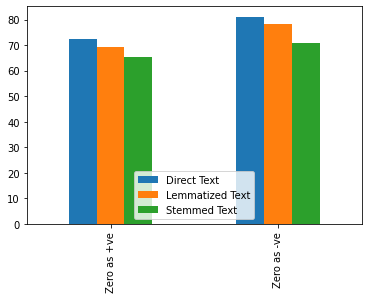

In [23]:
df.plot.bar()